This is for data cleaning and model design. 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/offmychest/data_theo/dataset.csv",engine='python')
data = data.drop(data.columns[0], axis= 1)
data = data.dropna()
data

,comment,label
0,It makes me really happy that y’all read this ...,1.0
1,I remember a lot of people complaining about t...,0.0
2,I think one of the the biggest issues is peopl...,0.0
3,thanks ppl i just got some earplugs and they w...,1.0
4,Living for this.,0.0
...,...,...
182343,is it for the whole weekend?,1.0
182344,Great stats bro! And better message to go with...,1.0
182345,How did she have a sad life?,0.0
182346,I’m aware. I’ve been before :),0.0


In [ ]:
new = []
print(len(data))
# print(data['comment'][82610:])
print(len(data['comment']))
skip = [82612,82613]
for i in range(len(data)-1):
  if i not in skip and len(data['comment'][i])>200 and 'bing bong' not in data['comment'][i].lower():
    new.append((data['comment'][i],data['label'][i]))
print(len(new))
data = pd.DataFrame(new,columns=['comment','label'])
data

31356
31356
31349


,comment,label
0,I think one of the the biggest issues is peopl...,0.0
1,"Actually, yes. Everyone I know that has lived ...",0.0
2,For me kratom is very subtle and gives me mayb...,1.0
3,I would like to see this but with a provision ...,0.0
4,"Hi, sry for the lack of info. Ive had about 5 ...",1.0
...,...,...
31344,I'm weird out by guys who want to rape and cal...,1.0
31345,Yeah but I don’t think these people above are ...,0.0
31346,Honestly unless someone was extremely desperat...,1.0
31347,"I agree, their customer service sucks!! Walmar...",1.0


In [ ]:
print(data.groupby('label').label.count())

label
0.0    14830
1.0    16519
Name: label, dtype: int64


In [ ]:
Depressed_message_lengths = []
Control_message_lengths = []
skip = [82612,82613]
for i in range(len(data)):
  if i in skip:
    continue
  if data['label'][i]==1:
    Depressed_message_lengths.append(len(data['comment'][i]))
  else:
    Control_message_lengths.append(len(data['comment'][i]))


In [ ]:
depressed_mess_avg = sum(Depressed_message_lengths)/len(Depressed_message_lengths)
control_mess_avg = sum(Control_message_lengths)/len(Control_message_lengths)

In [ ]:
print(depressed_mess_avg)
print(control_mess_avg)

358.12440220352323
344.7289883399609


**Data preprocessing**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#load dictionary of english contractions
contractions = pd.read_json('/content/gdrive/My Drive/offmychest/data_theo/contractions.json', typ='series')
contractions = contractions.to_dict()

In [ ]:
contractions_regular_expression = re.compile('(%s)' % '|'.join(contractions.keys()))
symbols_regular_expression = re.compile('[^0-9a-z #+_]')
link_regular_expression = re.compile('https\S+|www\S+|http\S+')

In [ ]:
def expandContractions(text, c_re=contractions_regular_expression):
    def replace(match):
        return contractions[match.group(0)]
    return c_re.sub(replace, text)

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
stemmer = WordNetLemmatizer()
stemmer2 = PorterStemmer()
def clean_posts(posts):
    cleaned_posts = []
    for post in posts:
        post = str(post)
        post = post.lower()
        post = symbols_regular_expression.sub(' ', post)
        post = link_regular_expression.sub(' ', post)
        post = expandContractions(post)
        post = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", post).split())
        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(post) 
        #lemmatizer
        filtered_sentence = [stemmer.lemmatize(word) for word in word_tokens]
        filtered_sentence = [stemmer2.stem(word) for word in filtered_sentence]
        filtered_sentence = [w for w in filtered_sentence if not w in stop_words]

        post = ' '.join(filtered_sentence)
        
        cleaned_posts.append(post)
        
    return cleaned_posts

In [ ]:
X = clean_posts([post for post in data['comment']])

In [ ]:
# # Reformatting the comments: remove links, usernames. convert to all lowercase

# new_comments = []

# comment_list = data.values.tolist()
# print(f"length of sd_comment_list is {len(comment_list)}")
# print(comment_list[:4])

# for message in comment_list:
#   label = message[1]
#   message = message[0]
#   if type(message) != str:
#     continue

#   words = message.split()
#   new_words = []

#   for word in words:
#     if 'u/' in word:
#       continue
#     if 'http' in word:
#       continue
#     if 'r/' in word:
#       continue
#     new_words.append(word.lower())
  
#   while len(new_words) >= 500:
#     new_message = ' '.join(new_words[:500])
#     new_words = new_words[500:]
#     new_comments.append([new_message, label])

#   new_message = ' '.join(new_words)
#   new_comments.append([new_message, label])
#   new_message = ''


# data = pd.DataFrame(new_comments, columns=['comment', 'label'])

In [ ]:
# # Preprocessing

# # df = pd.read_csv ('sd_comments_rujul.csv')
# print(data.columns)
# print(data.shape)

# # Get rid of [removed] messages
# data = data.loc[data["comment"] != "[removed]"]
# print(data.shape)


# # Replace usernames with numbers
# #df['Author'] = pd.factorize(df.Author)[0]
# data = data.loc[data["comment"] != "[deleted]"]
# print(data.shape)
# #print(df)
# #df.to_csv('demo_data5_rujul.csv')

# X = clean_posts([post for post in data['comment']])


# # sd_comments_df.to_csv('sd_comments_rujul_1.csv')

In [ ]:
X_ = X
print(len(data))
data


31356


,comment,label
0,I think one of the the biggest issues is peopl...,0.0
1,"Actually, yes. Everyone I know that has lived ...",0.0
2,For me kratom is very subtle and gives me mayb...,1.0
3,I would like to see this but with a provision ...,0.0
4,"Hi, sry for the lack of info. Ive had about 5 ...",1.0
...,...,...
31351,Yeah but I don’t think these people above are ...,0.0
31352,Honestly unless someone was extremely desperat...,1.0
31353,"I agree, their customer service sucks!! Walmar...",1.0
31354,Honestly man If I could just get a sub thats a...,1.0


In [ ]:
data['comment'] = X
data

,comment,label
0,think one biggest issu peopl drive ace away th...,0.0
1,actual ye everyon know ha live grew ha mostli ...,0.0
2,kratom veri subtl give mayb 20min motiv improv...,1.0
3,would like see thi provis privat woman colleg ...,0.0
4,hi sri lack info ive 5 life couldnt hold month...,1.0
...,...,...
31351,yeah think peopl abov aromat asexu got hurt so...,0.0
31352,honestli unless someon wa extrem desper whi wo...,1.0
31353,agre custom servic suck walmart amazon better ...,1.0
31354,honestli man could get sub actual base edh str...,1.0


In [ ]:
data.to_csv('data_cleanish2.csv')
!cp data_cleanish2.csv "/content/gdrive/My Drive/offmychest/data_theo/"

**Visual representation**

In [ ]:
depressive_only = data.loc[data['label'] == 1]
depressive_posts = [post for post in depressive_only['comment']]
#depressive_posts = [clean_posts([post for post in depressive_only['post']])]
depressive_words = ' '.join(list(map(str, depressive_posts)))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)

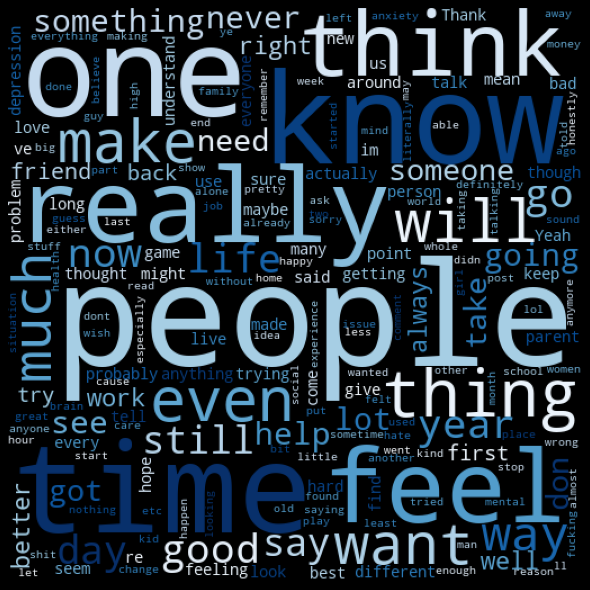

In [ ]:
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
non_depressive_only = data.loc[data['label'] == 0]
non_depressive_posts = [post for post in non_depressive_only['comment']]
#depressive_posts = [clean_posts([post for post in depressive_only['post']])]
non_depressive_words = ' '.join(list(map(str, non_depressive_posts)))
non_depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(non_depressive_words)

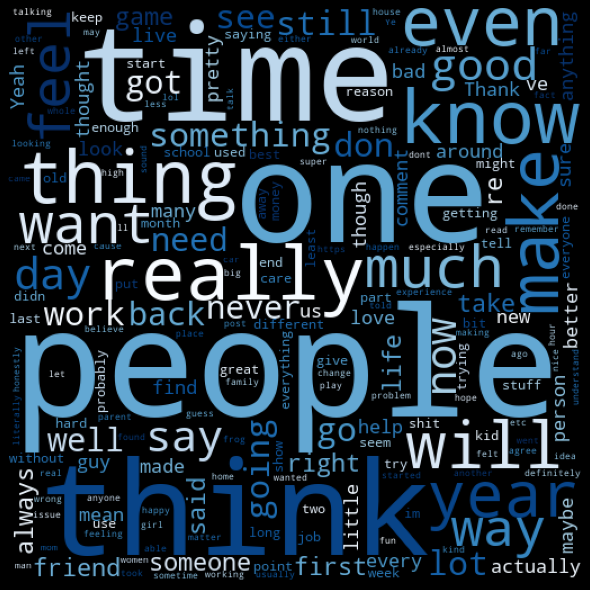

In [ ]:
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(non_depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
X = X_
y = [label for label in data['label']]

Now let's try a Random Forrest Classifier

In [ ]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500,min_df = 5, max_df = 0.7,stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X).toarray()

In [ ]:
#TFIDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [ ]:
#Training and Testing Sets
print(len(X),len(y))
# X, y = X[:10000], y[:10000]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

31356 31356


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
# classifier.fit(X_train, y_train) 
# y_pred = classifier.predict(X_test)

In [ ]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = classifier.predict_proba(X[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
X = np.array(X)
y = np.array(y)

for (train, test), i in zip(cv.split(X, y), range(5)):
    classifier.fit(X[train], y[train])
    print(i)
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
# y_pred = classifier.predict(X_test)

In [ ]:
import joblib
joblib.dump(classifier,'/content/gdrive/My Drive/offmychest/data_theo/RFC.joblib')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

Now let's try Fasttext

In [ ]:
# Install Fasttext
!wget https://github.com/facebookresearch/fastText/archive/v0.9.2.zip
!unzip v0.9.2.zip

#Move to the fastText directory and build it:

%cd fastText-0.9.2
# for command line tool :
!make
# for python bindings :
!pip install .

In [ ]:
!pip install emoji

In [ ]:
# Fasttext modeling
import fasttext
import emoji
import os

print(os.getcwd())
df = pd.read_csv ('/content/gdrive/My Drive/offmychest/data_theo/data_cleanish2.csv')
df_list = df.values.tolist()


final_text = ''

for row in df_list:
  label = row[2]
  body = row[1]
  if type(body) == str:
     body = emoji.demojize(body, delimiters=(' ', ' '))

  final_text += '__label__' + str(int(label)) + ' ' + str(body) + '\n'

data_text = open("data_text.txt", "w")
data_text.write(final_text)
data_text.close()

In [ ]:
# Opening a file
file = open("data_text.txt","r")
Counter = 0
  
# Reading from file
Content = file.read()
CoList = Content.split("\n")
  
for i in CoList:
    if i:
        Counter += 1
          
print("This is the number of lines in the file")
print(Counter)

In [ ]:
# !head -n 109420 data_text.txt > data.train
# !tail -n 36470 data_text.txt > data.valid
!head -n 54521 data_text.txt > data.train
!tail -n 18174 data_text.txt > data.valid

In [ ]:
fasttext_model = fasttext.train_supervised(input="data.train", wordNgrams=3, lr=0.5, epoch=10)

In [ ]:
fasttext_model.test("data.valid")

In [ ]:
fasttext_model_nowordgrams = fasttext.train_supervised(input="data.train", lr=0.5, epoch=15)

In [ ]:
fasttext_model_nowordgrams.test("data.valid")